<a href="https://colab.research.google.com/github/valeriandwi/dicoding-data-scientist-expert/blob/main/Human_Resource_Problem_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import pandas as pd

employees_df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
    encoding='windows-1252'
)
employees_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [234]:
employees_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [235]:
# Hitung nilai rata-rata atau median dari kolom "attrition" yang tidak null
attrition_mean = employees_df['Attrition'].mean()  # nilai rata-rata
attrition_median = employees_df['Attrition'].median()  # nilai median

# Isi nilai null dengan estimasi (rata-rata atau median)
employees_df['Attrition'].fillna(int(attrition_mean), inplace=True)  # mengisi null dengan nilai rata-rata
# data['attrition'].fillna(attrition_median, inplace=True)  # mengisi null dengan nilai median

In [236]:
employees_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [237]:
#Make sure datas type
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [238]:
#Drop all non numeric data
kmeans_df = employees_df.select_dtypes(include=['int', 'float'])
kmeans_df = kmeans_df[["EmployeeId","Age","Attrition","WorkLifeBalance","YearsAtCompany","PerformanceRating"]]
kmeans_df = kmeans_df[kmeans_df['Attrition'] == 1]
kmeans_df

,EmployeeId,Age,Attrition,WorkLifeBalance,YearsAtCompany,PerformanceRating
1,2,37,1.0,1,1,3
2,3,51,1.0,4,10,3
7,8,55,1.0,3,5,3
11,12,20,1.0,3,1,3
24,25,24,1.0,2,2,3
...,...,...,...,...,...,...
1455,1456,40,1.0,3,5,3
1457,1458,29,1.0,2,4,3
1464,1465,28,1.0,2,10,3
1467,1468,28,1.0,2,1,3


In [239]:
from sklearn.preprocessing import PowerTransformer
import joblib
import numpy as np

def power_transforms(features, df):
  df = df[features]
  for feature in features:
    transformer = PowerTransformer(standardize=True)
    y = np.asanyarray(df[feature])
    y = y.reshape(-1,1)
    transformer.fit(y)
    df["transform_{}".format(feature)] = transformer.transform(y)
    df.drop([feature], axis=1, inplace=True)
    joblib.dump(transformer, "transformer_{}.joblib".format(feature))
  return df

In [240]:
transformed_kmeans_df = power_transforms(features=["Age", "WorkLifeBalance", "YearsAtCompany"],df=kmeans_df)
transformed_kmeans_df.head()

,transform_Age,transform_WorkLifeBalance,transform_YearsAtCompany
1,0.506438,-1.858368,-0.984765
2,1.584760,1.794717,1.125981
7,1.832230,0.353378,0.425941
11,-1.676061,0.353378,-0.984765
24,-1.014216,-0.872237,-0.441662


In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

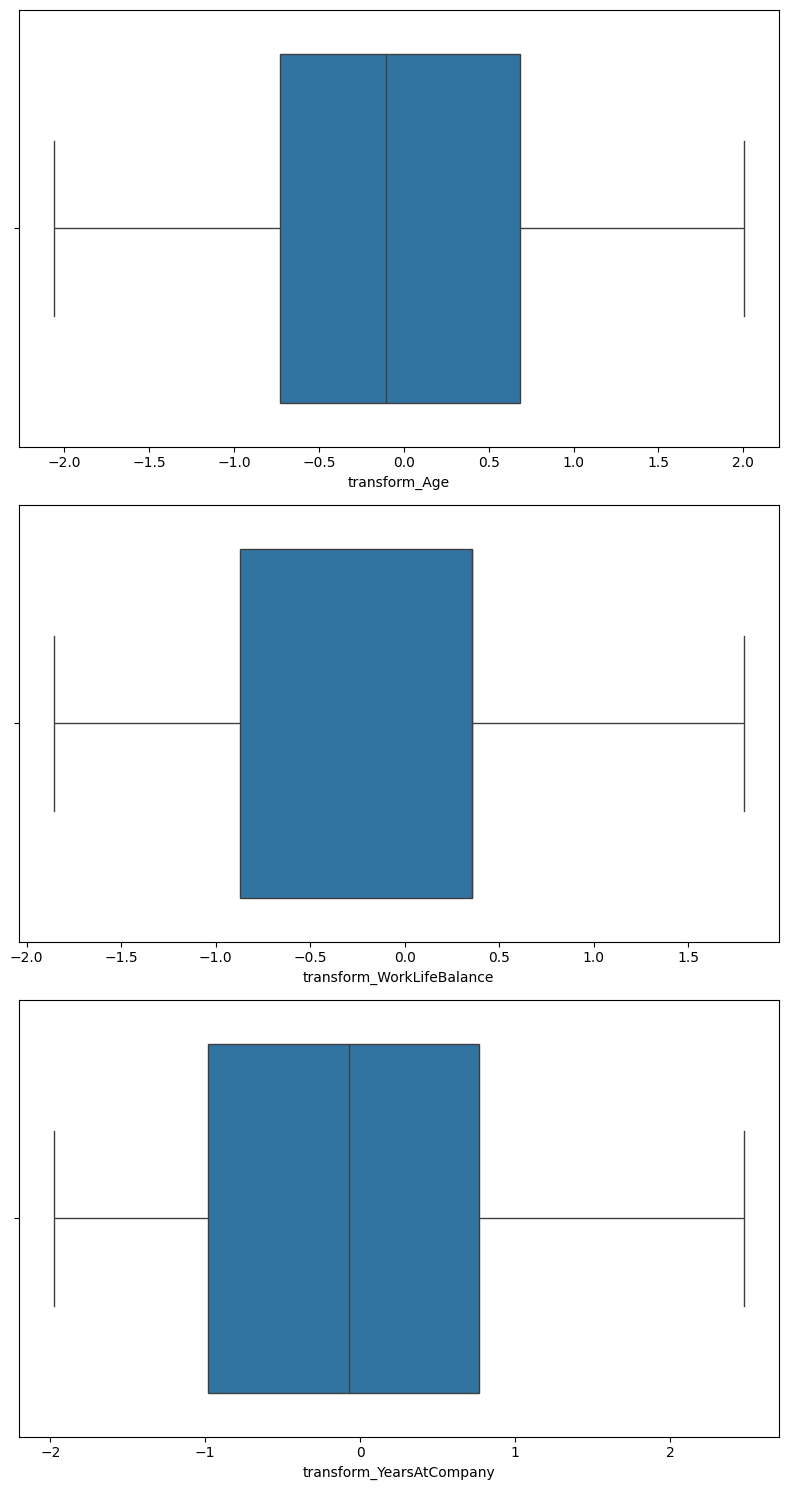

In [232]:
numerical_dis_plot(
    features=["transform_Age", "transform_WorkLifeBalance", "transform_YearsAtCompany"],
    df=transformed_kmeans_df,
)

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

inertia = {}
silhouette = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_kmeans_df)
    inertia[k] = kmeans.inertia_ # Calculate the inertia
    silhouette[k] = silhouette_score(transformed_kmeans_df, kmeans.labels_) # Calculate the silhouette coefficient

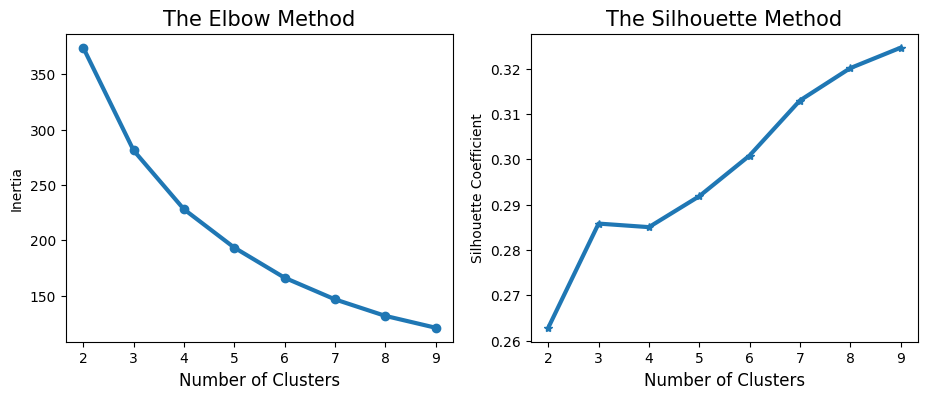

In [243]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(inertia.keys(), inertia.values(), marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Inertia')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(silhouette.keys(), silhouette.values(), marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()

In [244]:
import joblib

K = 9

model = KMeans(n_clusters=K, random_state=75)
model.fit(transformed_kmeans_df)

joblib.dump(model, "kmeans_clustering_model.joblib")

['kmeans_clustering_model.joblib']

In [245]:
clusters = model.predict(transformed_kmeans_df)

kmeans_df["employee_segment"] = clusters.astype(str)
kmeans_df.sample(5)

,EmployeeId,Age,Attrition,WorkLifeBalance,YearsAtCompany,PerformanceRating,employee_segment
1134,1135,44,1.0,3,10,3,3
268,269,39,1.0,2,1,3,4
1444,1445,45,1.0,3,24,3,3
1467,1468,28,1.0,2,1,3,0
1220,1221,29,1.0,3,1,3,1


In [246]:
#Analytics

result_kmeans_df = pd.merge(
    left=employees_df,
    right=kmeans_df[["EmployeeId", "employee_segment"]],
    on="EmployeeId",
    how="inner"
)
result_kmeans_df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,employee_segment
0,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,80,0,15,2,1,1,0,0,0,4
1,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,80,3,18,2,4,10,0,2,7,5
2,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,80,1,24,2,3,5,2,1,4,7
3,12,20,1.0,Travel_Rarely,129,Research & Development,4,3,Technical Degree,1,...,80,0,1,2,3,1,0,0,0,8
4,25,24,1.0,Travel_Rarely,813,Research & Development,1,3,Medical,1,...,80,1,6,2,2,2,0,2,0,0


In [247]:
#categorical the result of segments
result_kmeans_df['employee_segment'] = pd.Categorical(result_kmeans_df['employee_segment'], [
    "0", "1", "2", "3", "4", "5", "6", "7", "8"
])

<Axes: xlabel='count', ylabel='employee_segment'>

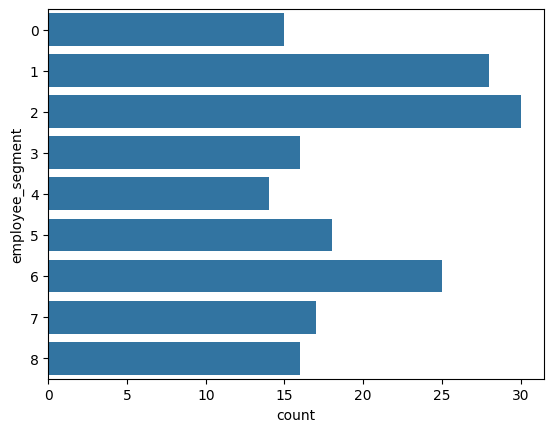

In [248]:
import seaborn as sns

sns.countplot(data=result_kmeans_df, y='employee_segment')

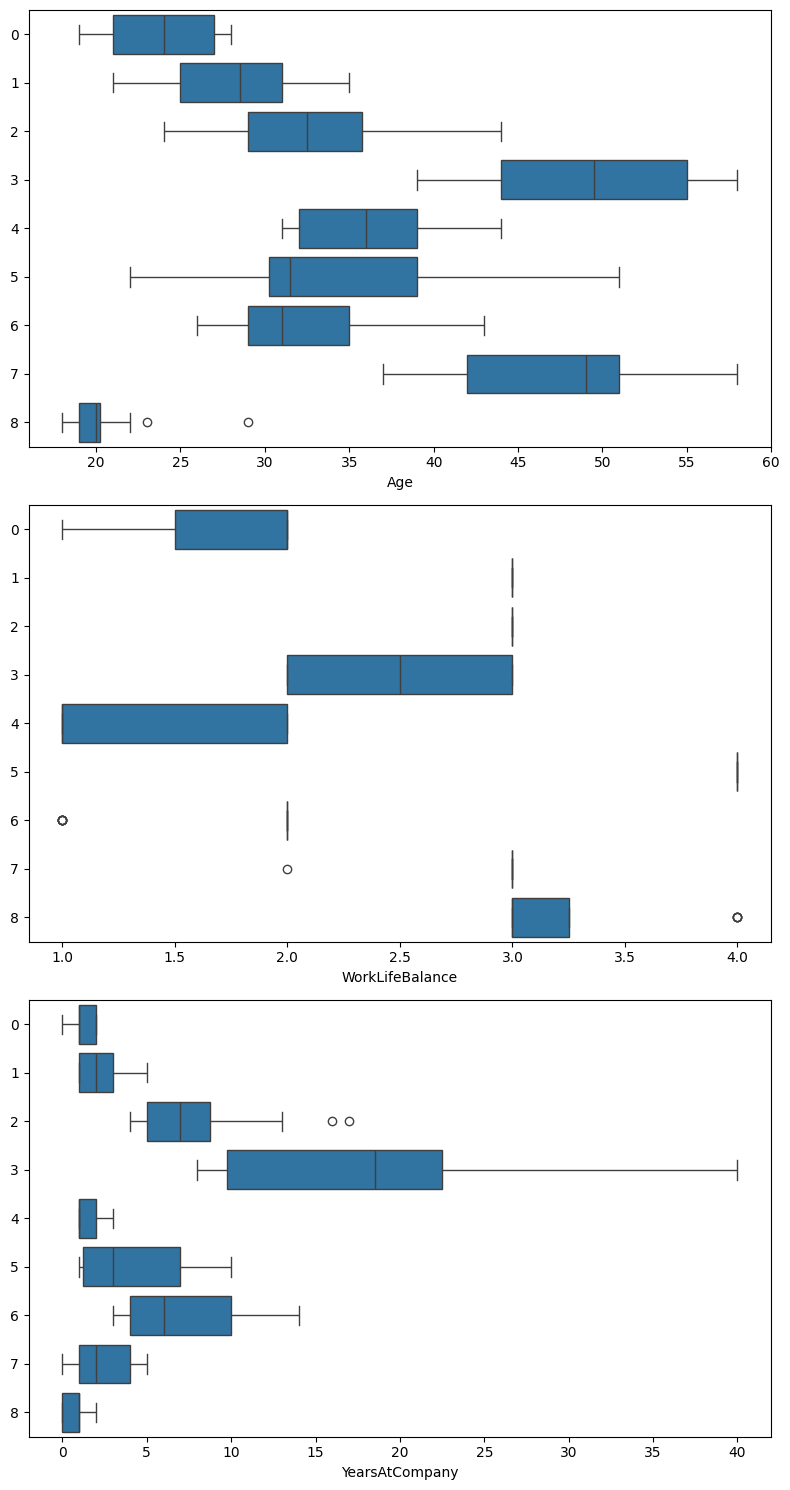

In [249]:
numerical_dis_plot(
    features=["Age", "WorkLifeBalance", "YearsAtCompany"],
    df=result_kmeans_df,
    segment_feature="employee_segment"
)